<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/Logistic_Regression_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Import Libraries and Read DataSets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Step 2. Data Manipulation

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Step 3. Handling Missing Values

In [ ]:
diabetes_df = diabetes.drop(['Pregnancies','Outcome'], axis = 1)

In [ ]:
diabetes_df.replace(0, np.nan, inplace = True)

In [ ]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
np.round(diabetes_df['Insulin'].mean())

156.0

In [ ]:
diabetes_df['Insulin'].fillna(np.round(diabetes_df['Insulin'].mean()), inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
# strategy = 'mean', 'median', 'most_frequent'
impute = SimpleImputer(strategy = 'median')

In [ ]:
impute.fit(diabetes_df)

SimpleImputer(strategy='median')

In [ ]:
diabetes_array = impute.transform(diabetes_df)
diabetes_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df1 = pd.DataFrame(diabetes_array, columns = diabetes_df.columns)

In [ ]:
diabetes_df1['Pregnancies'] = diabetes.Pregnancies
diabetes_df1['Outcome'] = diabetes.Outcome

In [ ]:
diabetes_df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1,1


Step 4. Is there any Imbalanced Class ?

In [ ]:
diabetes_df1['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

##### Step 5. Prepare the Data for Classification

In [ ]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y = diabetes_df1['Outcome']

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature, transformed_label = oversample.fit_resample(X, Y)

In [ ]:
transformed_label.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

##### Step 6. Split Train & Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_feature, transformed_label, test_size = 0.2, random_state = 0)

##### Step 7. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver = 'liblinear', max_iter = 10000)

In [ ]:
logit_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
logit_model.score(x_test, y_test)

0.81

##### Classification Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = logit_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[85, 20],
       [18, 77]])

<Axes: >

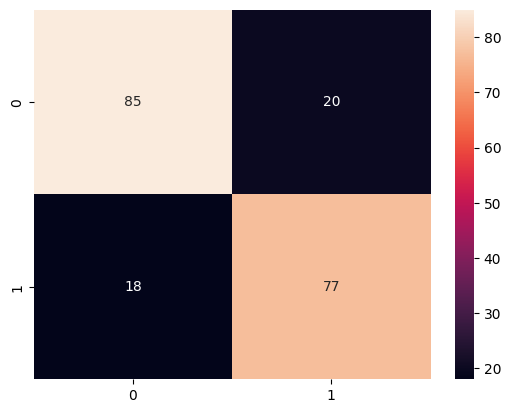

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.79      0.81      0.80        95

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

